In [1]:
#Loading libraries
library(rpart,quietly = TRUE)
library(rpart.plot,quietly = TRUE)
library(caret,quietly = TRUE)
library(rattle)

Loading required package: tibble

Loading required package: bitops

Rattle: A free graphical interface for data science with R.
Version 5.4.0 Copyright (c) 2006-2020 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.



In [2]:
#find.package('caret')
#install.packages('rpart')
#install.packages("rpart.plot")
#install.packages('rattle')

In [3]:
#Reading the data set as a dataframe
df <- read.csv ("C:/Users/User/ML codes/heart_disease.csv")

In [4]:
str(df)

'data.frame':	270 obs. of  14 variables:
 $ age                                 : int  70 67 57 64 74 65 56 59 60 63 ...
 $ sex                                 : int  1 0 1 1 0 1 1 1 1 0 ...
 $ chest.pain.type                     : int  4 3 2 4 2 4 3 4 4 4 ...
 $ resting.blood.pressure              : int  130 115 124 128 120 120 130 110 140 150 ...
 $ serum.cholestoral.in.mg.dl          : int  322 564 261 263 269 177 256 239 293 407 ...
 $ fasting.blood.sugar...120.mg.dl     : int  0 0 0 0 0 0 1 0 0 0 ...
 $ resting.electrocardiographic.results: int  2 2 0 0 2 0 2 2 2 2 ...
 $ maximum.heart.rate.achieved         : int  109 160 141 105 121 140 142 142 170 154 ...
 $ exercise.induced.angina             : int  0 0 0 1 1 0 1 1 0 0 ...
 $ oldpeak                             : num  2.4 1.6 0.3 0.2 0.2 0.4 0.6 1.2 1.2 4 ...
 $ slope.of.peak                       : int  2 2 1 2 1 1 2 2 2 2 ...
 $ number.of.major.vessels             : int  3 0 0 1 1 0 1 1 2 3 ...
 $ thal                        

In [5]:
# number of rows with missing values
nrow(df) - sum(complete.cases(df))

[1] 0

In [6]:
head(df)

,age,sex,chest.pain.type,resting.blood.pressure,serum.cholestoral.in.mg.dl,fasting.blood.sugar...120.mg.dl,resting.electrocardiographic.results,maximum.heart.rate.achieved,exercise.induced.angina,oldpeak,slope.of.peak,number.of.major.vessels,thal,Disease
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
2,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
3,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
4,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
5,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
6,65,1,4,120,177,0,0,140,0,0.4,1,0,7,0


In [8]:
# analyzing the class  variable
table(df$Disease,df$Disease)

   
      0   1
  0 150   0
  1   0 120

In [9]:
nrow(df)

[1] 270

In [10]:
#set seed to ensure reproducible results
set.seed(250)
#spliting into training and test data sets in 3:1 ratio
df[,'train'] <- ifelse(runif(nrow(df))<0.75,1,0)
#separate training and test sets
train_df <- df[df$train==1,]
test_df <- df[df$train==0,]
#get column index of train flag
df_trainColNum <- grep('train',names(train_df))

In [11]:
str(train_df)

'data.frame':	214 obs. of  15 variables:
 $ age                                 : int  70 57 59 60 59 53 44 61 57 71 ...
 $ sex                                 : int  1 1 1 1 1 1 1 1 0 0 ...
 $ chest.pain.type                     : int  4 2 4 4 4 4 3 1 4 4 ...
 $ resting.blood.pressure              : int  130 124 110 140 135 142 140 134 128 112 ...
 $ serum.cholestoral.in.mg.dl          : int  322 261 239 293 234 226 235 234 303 149 ...
 $ fasting.blood.sugar...120.mg.dl     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ resting.electrocardiographic.results: int  2 0 2 2 0 2 2 0 2 0 ...
 $ maximum.heart.rate.achieved         : int  109 141 142 170 161 111 180 145 159 125 ...
 $ exercise.induced.angina             : int  0 0 1 0 0 1 0 0 0 0 ...
 $ oldpeak                             : num  2.4 0.3 1.2 1.2 0.5 0 0 2.6 0 1.6 ...
 $ slope.of.peak                       : int  2 1 2 2 2 1 1 2 1 2 ...
 $ number.of.major.vessels             : int  3 0 1 2 0 0 0 2 1 0 ...
 $ thal                            

In [12]:
str(test_df)

'data.frame':	56 obs. of  15 variables:
 $ age                                 : int  67 64 74 65 56 63 48 48 51 57 ...
 $ sex                                 : int  0 1 0 1 1 0 1 0 0 1 ...
 $ chest.pain.type                     : int  3 4 2 4 3 4 2 3 3 3 ...
 $ resting.blood.pressure              : int  115 128 120 120 130 150 130 130 120 128 ...
 $ serum.cholestoral.in.mg.dl          : int  564 263 269 177 256 407 245 275 295 229 ...
 $ fasting.blood.sugar...120.mg.dl     : int  0 0 0 0 1 0 0 0 0 0 ...
 $ resting.electrocardiographic.results: int  2 0 2 0 2 2 2 0 2 2 ...
 $ maximum.heart.rate.achieved         : int  160 105 121 140 142 154 180 139 157 150 ...
 $ exercise.induced.angina             : int  0 1 1 0 1 0 0 0 0 0 ...
 $ oldpeak                             : num  1.6 0.2 0.2 0.4 0.6 4 0.2 0.2 0.6 0.4 ...
 $ slope.of.peak                       : int  2 2 1 1 2 2 2 1 1 2 ...
 $ number.of.major.vessels             : int  0 1 1 0 1 3 0 0 0 1 ...
 $ thal                         

In [13]:
number.perfect.splits <- apply(X=df[-1], MARGIN = 2, FUN = function(col){
t <- table(df$Disease,col)
sum(t == 0)
})

In [14]:
# Descending order of perfect splits
order <- order(number.perfect.splits,decreasing = TRUE)
number.perfect.splits <- number.perfect.splits[order]

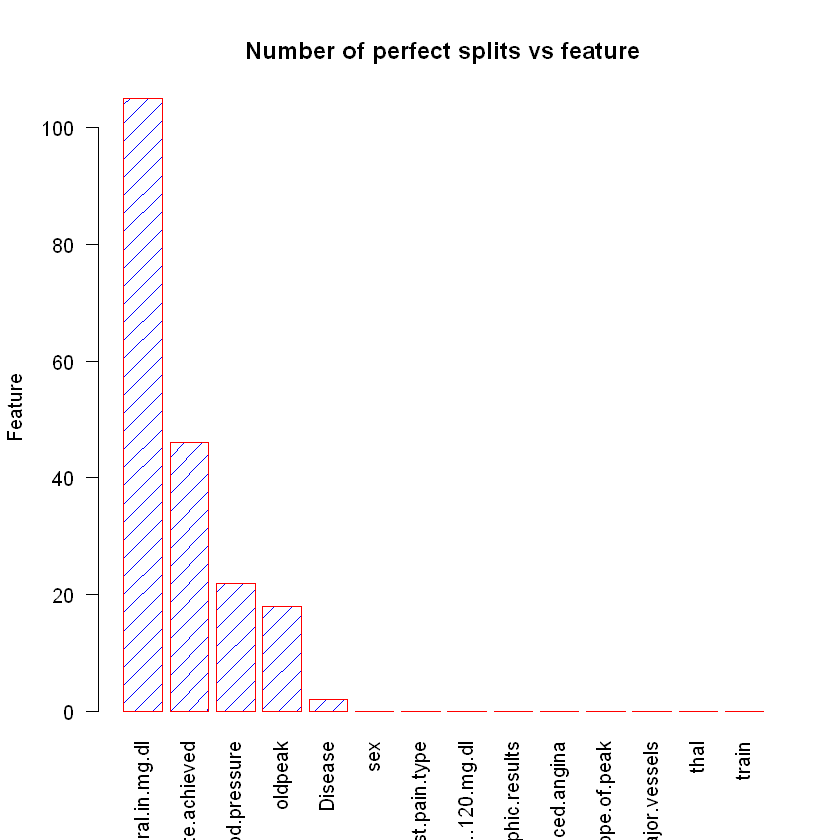

In [15]:
# Plot graph
#par(mar=c(10,2,2,2))
barplot(number.perfect.splits,main="Number of perfect splits vs feature",
xlab="",ylab="Feature",las=2,border="red",col="blue",density=10)

In [16]:
#data splicing
set.seed(12345)
train <- sample(1:nrow(df),size = ceiling(0.80*nrow(df)),replace = FALSE)
# training set
df_train <- df[train,]
# test set
df_test <- df[-train,]

In [20]:
# building the classification tree with rpart
tree <- rpart(Disease~.,data=df_train, method = "class")

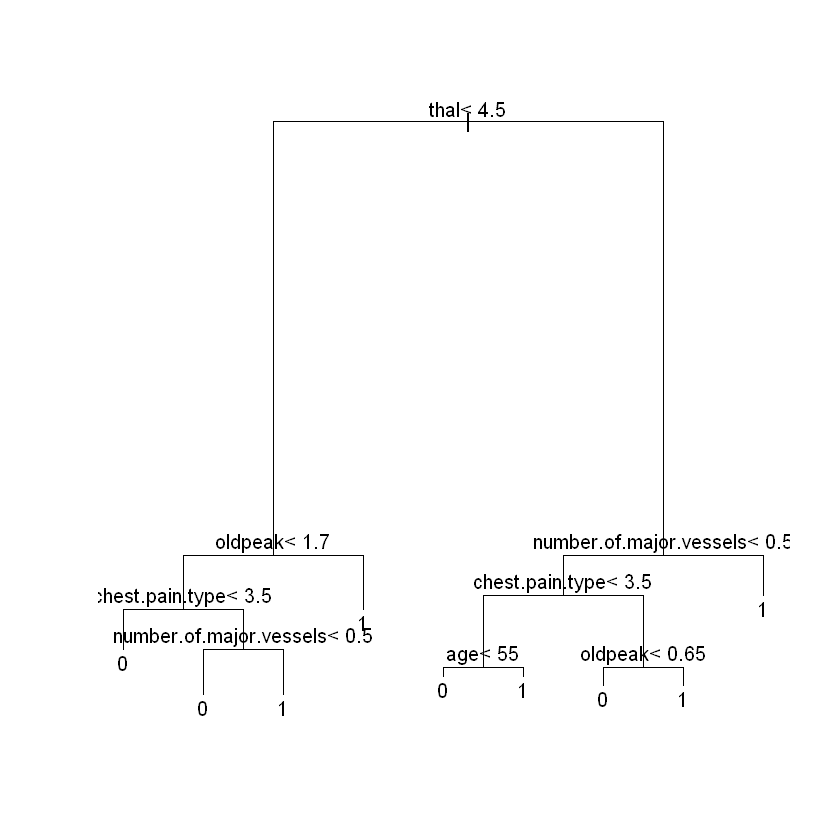

In [22]:
#Obtaining the train and test data set
#remove train flag column from train and test sets
train_df <- train_df[,-df_trainColNum]
test_df <- test_df[,-df_trainColNum]
#Get column index of predicted variable in dataset
typeColNum_df <- grep('Disease',names(df))
#Constructing the required Decision tree model
rpart_model_df <- rpart(Disease~.,data = train_df, method= 'class')
# Plotting the tree
plot(rpart_model_df)
text(rpart_model_df)

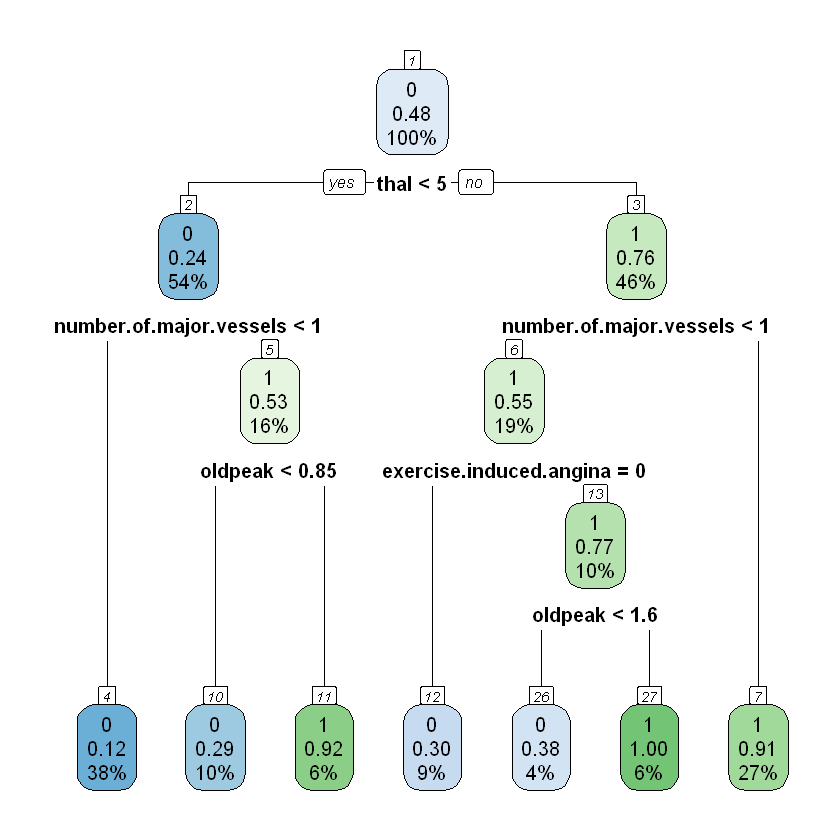

In [23]:
# Visualize the decision tree with rpart.plot
rpart.plot(tree, nn=TRUE, cex=1, box.palette = "auto")

In [24]:
#There are three level in the class variable, 1 as setosa and 2 as versicolor
#3 as Virginica
v<-df$Disease
table(v)

v
  0   1 
150 120 

In [25]:
"""
#set seed to ensure reproducible results
set.seed(250)
#spliting into training and test data sets in 3:1 ratio
df[,'train'] <- ifelse(runif(nrow(df))<0.75,1,0)
#separate training and test sets
train_df <- df[df$train==1,]
test_df <- df[df$train==0,]
#get column index of train flag
df_trainColNum <- grep('train',names(train_df))

str(test_df)
"""

ERROR: Error in parse(text = x, srcfile = src): <text>:1:3: unexpected string constant
12: str(test_df)
13: "
      ^


In [26]:
summary(rpart_model_df)

Call:
rpart(formula = Disease ~ ., data = train_df, method = "class")
  n= 214 

          CP nsplit rel error    xerror       xstd
1 0.49484536      0 1.0000000 1.0000000 0.07507584
2 0.06185567      1 0.5051546 0.5773196 0.06628938
3 0.04123711      2 0.4432990 0.6288660 0.06808195
4 0.02577320      4 0.3608247 0.5773196 0.06628938
5 0.02061856      6 0.3092784 0.5773196 0.06628938
6 0.01030928      7 0.2886598 0.5463918 0.06509869
7 0.01000000      8 0.2783505 0.5154639 0.06381581

Variable importance
                       thal                     oldpeak 
                         25                          16 
            chest.pain.type maximum.heart.rate.achieved 
                         12                          11 
    number.of.major.vessels     exercise.induced.angina 
                         10                           8 
                        sex                         age 
                          6                           5 
     resting.blood.pressure  serum

In [27]:
#Checking how good the model is
rpart_predict_df<- predict(rpart_model_df,test_df[,-typeColNum_df],type='class')
mn_df <- mean(rpart_predict_df==test_df$Disease)
mn_df

[1] 0.7321429

In [28]:
# Constructing the confusion matrix to find out the efficiency of the model
table(pred=rpart_predict_df,true=test_df$Disease)

    true
pred  0  1
   0 22  4
   1 11 19

In [29]:
# Constructing the confusion matrix to find out the efficiency of the model
t <- table(test_df$Disease,rpart_predict_df)

In [30]:
#install.packages('e1071', dependencies=TRUE)
confusionMatrix(t)

Confusion Matrix and Statistics

   rpart_predict_df
     0  1
  0 22 11
  1  4 19
                                         
               Accuracy : 0.7321         
                 95% CI : (0.597, 0.8417)
    No Information Rate : 0.5357         
    P-Value [Acc > NIR] : 0.002062       
                                         
                  Kappa : 0.471          
                                         
 Mcnemar's Test P-Value : 0.121335       
                                         
            Sensitivity : 0.8462         
            Specificity : 0.6333         
         Pos Pred Value : 0.6667         
         Neg Pred Value : 0.8261         
             Prevalence : 0.4643         
         Detection Rate : 0.3929         
   Detection Prevalence : 0.5893         
      Balanced Accuracy : 0.7397         
                                         
       'Positive' Class : 0              
                                         